# Fake News Detection - Introduction

Our project stands at the forefront of combating the escalating issue of fake news within the digital realm, harnessing the power of data-driven insights and sophisticated machine learning technologies. Central to our initiative is the LIAR dataset, an extensively curated repository of statements evaluated for their truthfulness across a spectrum from "true" to "pants on fire." This invaluable resource is instrumental in our endeavor to unearth patterns, indicators, and characteristics that signify fake news. We embark on a mission to dissect pivotal questions, such as the propensity of certain individuals or entities to disseminate misinformation, the role of specific contexts or platforms in amplifying fake news, and the prevalence of misinformation within discussions on various subjects.

**Objective:** We aim to answer pivotal questions such as:


*   Are certain individuals or entities more inclined to propagate misinformation?
*   Do specific contexts or platforms facilitate the spread of fake news more than others?
*   Is misinformation more rampant in discussions about certain subjects, and does political affiliation influence the spread of false information?

**Methodology:** Our approach combines exploratory data analysis (EDA) with advanced machine learning techniques. The EDA phase involves a deep dive into the LIAR dataset, enabling us to formulate hypotheses about the nature of fake news. Through this analysis, we uncover the intricate relationships between the veracity of statements and various factors like speaker identities, subject matters, and political leanings.

In the machine learning phase, we leverage models such as Support Vector Machines (SVM), K-Nearest Neighbors (KNN), and Decision Trees. These models are trained to classify statements based on their truthfulness, employing text data that has been preprocessed through TF-IDF vectorization and standard scaling to optimize model performance.



# Changes since last proposal

Since our initial proposal, our project's scope has undergone several adjustments to better align with our objectives and the challenges encountered during the preliminary stages of our research. Below are the key changes that have been made:

**Removed Parts:**

*   **Narrowed Focus on Datasets**: Initially, we planned to incorporate a broad array of datasets. However, we refined our focus to the LIAR dataset, finding it to be the most pertinent and comprehensive for our goals. This decision allowed us to concentrate our efforts on extracting the most meaningful insights and predictive power from a well-defined source of data.
*   **Streamlined NLP Techniques**: While our original proposal included a wide range of NLP techniques for analysis, we honed in on TF-IDF vectorization. This method proved most effective for transforming text data into a format amenable to machine learning, allowing us to capture the essential features of the text more accurately.

**Newly Added Parts:**

*   **Enhanced EDA**: We conducted a thorough exploratory data analysis focusing on identifying potential indicators of fake news within the LIAR dataset. This involved sophisticated visualizations that examine how the truthfulness of statements correlates with speakers, subjects, and political affiliations, offering insights into the dynamics of misinformation spread.
*   **Expanded Machine Learning Model Suite**: In addition to the initially planned SVM and Decision Trees, we introduced a KNN classifier into our model comparison. This inclusion allows us to assess the efficacy of various machine learning strategies in predicting the truthfulness of statements.
*   **Advanced Feature Engineering**: We implemented a feature engineering step that combines several columns into a singular, comprehensive text feature. This approach is designed to enhance the machine learning models' ability to interpret the nuances inherent in the data, providing a richer set of inputs for prediction.
*   **Preprocessing Techniques**: To ensure the machine learning models can effectively learn from the text data, we applied TF-IDF vectorization and standard scaling as preprocessing steps. These techniques standardize the feature space, enabling more accurate and robust model predictions.

These refinements and additions to our project scope and methodology reflect a responsive and iterative research process. By focusing on the most impactful datasets and methods, we aim to develop a nuanced and effective solution to detect and counteract the spread of fake news, thereby contributing to the integrity and trustworthiness of information in the digital age.

## Liar Training dataset
### We are going to look at the liar train.tsv file to form a hypothesis
### The overall question I am trying to answer is that are there certain indicators to detect fake news; such as certain people being more likely to spread false information, certain contexts where fake news is spread (like some podcasts, or some speakers, etc.), are some subjects more prone to having misinformation spread by a certain political party?
### As we explore the data, we will be forming more questions from that and building visualizations to show the data and explain it

In [ ]:
# this just shows the current directory
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# STEP1: upload the folder on your google drive
# Step2: Find the URL - it will look something like below - Now we set the working directory to the folder
%cd "/content/drive/MyDrive/liar_dataset"
!pwd

/content/drive/MyDrive/liar_dataset
/content/drive/MyDrive/liar_dataset


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import re
import string

# Enhanced Exploratory Data Analysis - Megha
# As we explore the training data information, we want to identify any relationships that we find among the data.
# Concepts and questions we are trying to look at:
 - We made another column called the "Truth Index"
  - We can attach a number to each label type. true to half-true = 1 and  barely-true to pants-fire = 0.
 - The truth index's numbering might change because we might need to perform operations with the level of truth in a statement
 - Are there any relationships between how misinformation is spread?
  - Do certain people have a pattern of spreading misinformation?
  - Do political parties spread misinformation among different subjects?
  - Can we quantify the label column as either true or false?

In [ ]:
# Open the csv test file and label the columns (Names from the README File)
liar = pd.read_csv("train.tsv", sep='\t', header=None,
                           names=["ID", "Label", "Statement", "Subject", "Speaker", "Speaker Job Title",
                                    "State Info", "Party Affiliation", "Barely True Count", "False Count",
                                  "Half True Count", "Mostly True Count", "Pants on Fire Count", "Context/Location"])

test = pd.read_csv("test.tsv", sep='\t', header=None, names=["ID", "Label", "Statement", "Subject", "Speaker", "Speaker Job Title",
                                                              "State Info", "Party Affiliation", "Barely True Count", "False Count",
                                                              "Half True Count", "Mostly True Count", "Pants on Fire Count", "Context/Location"])

hierarchy = {
    'true': 1,
    'mostly-true': 1,
    'half-true': 1,
    'barely-true': 0,
    'false': 0,
    'pants-fire': 0
}

liar["Truth Index"] = liar["Label"].map(hierarchy)
test["Truth Index"] = test["Label"].map(hierarchy)

liar

# Are some speakers more likely to spread misinformation/fake news than others?

The first idea we are exploring is the relationship between a speaker and how often their statements turn out to be true or false.
- For looking at the relationships initially, we will be focusing on three different people: former president Barack Obama, George Allen, and former president Donald Trump.
- The x-axis will be the different labels (true to pants-fire) and the y-axis will be the amount of statements that fall under each label

In [ ]:
# look at the specific speaker Barack Obama
# Does he seem to say what is normally one label or the other (are his statements mostly true or mostly false)?
liar_dataset_obama = liar.loc[liar["Speaker"] == "barack-obama"]
# liar_dataset_obama.sort_values(by="ID", ascending=False)
# Group by ID to focus on the labels of the articles. Not the subjects
lds_obama_grouped = liar_dataset_obama.groupby(["Label", "Truth Index"]).size().reset_index(name="count").sort_values(by='Truth Index', ascending=False)
lds_obama_grouped

,Label,Truth Index,count
2,half-true,1,124
3,mostly-true,1,130
5,true,1,103
0,barely-true,0,56
1,false,0,67
4,pants-fire,0,8


# Creating the Visualisations
- By making these graphs, we will be able to study the relationship of individuals and how often they make truthful statements.

<ipython-input-84-e05661d86804>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  obama_barplot = sns.barplot(data=lds_obama_grouped, x="Label", y="count", palette="Spectral")


<Axes: title={'center': "Validity of Barack Obama's Past Statements"}, xlabel='Label', ylabel='count'>

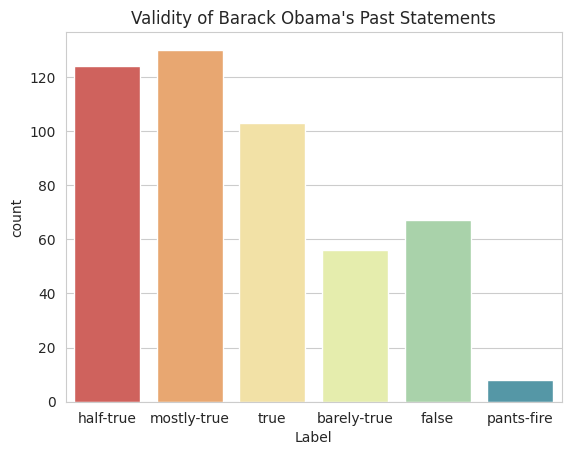

In [ ]:
# Create a visualization showing how Barack Obama's statements have been labeled
obama_barplot = sns.barplot(data=lds_obama_grouped, x="Label", y="count", palette="Spectral")
# sns.color_palette("Spectral", as_cmap=True)
obama_barplot.set_title("Validity of Barack Obama's Past Statements")
obama_barplot

<ipython-input-10-e2444408ed97>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  george_allen_barplot = sns.barplot(data=george_allen_grouped, x="Label", y="count", palette="Spectral")


<Axes: title={'center': "Validity of George Allan's Past Statements"}, xlabel='Label', ylabel='count'>

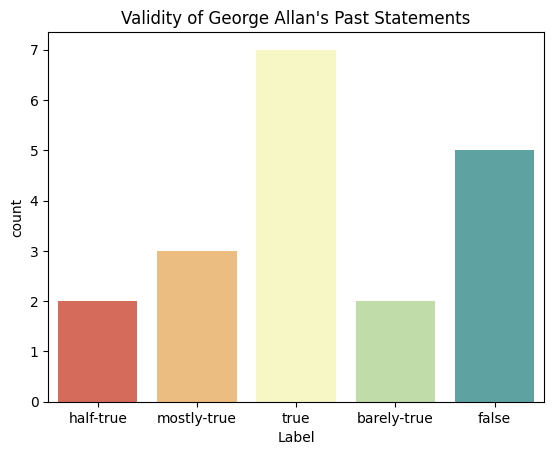

In [ ]:
# Create a visualization showing how George Allen's statements have been labeled
# speaker = liar_dataset.groupby(["Speaker", "Statement", "Speaker Job Title", "Truth Index", "Label", "Context/Location"]).size().reset_index(name="count").sort_values("count", ascending=False)
# speaker_statements = liar_dataset.groupby(["Speaker", "Statement",
#                                   "Truth Index", "Label"]).size().reset_index(name="count").sort_values("Speaker", ascending=True)
george_allen_dataset = liar.loc[liar["Speaker"] == "george-allen"]

george_allen_grouped = george_allen_dataset.groupby(["Label", "Truth Index"]).size().reset_index(name="count").sort_values(by="Truth Index", ascending=False)

george_allen_barplot = sns.barplot(data=george_allen_grouped, x="Label", y="count", palette="Spectral")
george_allen_barplot.set_title("Validity of George Allan's Past Statements")
george_allen_barplot

<ipython-input-11-cfed8f3f2298>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  donald_trump_barplot = sns.barplot(data=donald_trump_grouped, x="Label", y="count", palette="Spectral")


<Axes: title={'center': "Overall Validity of Donald Trump's Past Statements"}, xlabel='Label', ylabel='count'>

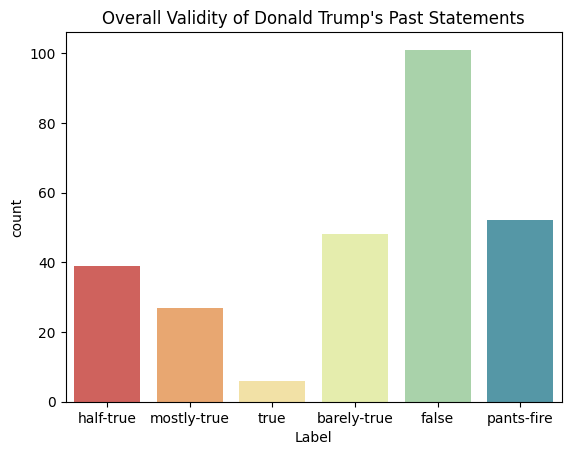

In [ ]:
donald_trump_dataset = liar.loc[(liar["Speaker"] == "donald-trump")]

donald_trump_grouped = donald_trump_dataset.groupby(["Label", "Truth Index"]).size().reset_index(name="count").sort_values(by="Truth Index", ascending=False)

donald_trump_barplot = sns.barplot(data=donald_trump_grouped, x="Label", y="count", palette="Spectral")
donald_trump_barplot.set_title("Overall Validity of Donald Trump's Past Statements")

donald_trump_barplot

# Creating a honesty-dishonesty ratio and plotting of other individuals
Now that we have looked at the truthfulness of different individuals, we can make a scatterplot of individuals and where they lie in terms of a ratio of honesty and dishonesty to all statements.
- Those with a higher ratio would be considered as more honest than those who are not
- Some individuals tend to have more statements put out compared to others.It's crucial to consider not just the absolute quantity of truth versus lies spoken by an individual, but also the ratio of truth to lies when making our scatterplot.

By looking at the ratio of honesty and dishonesty to all statements, we can better analyze behaviors among people, and treat those with higher ratios as more trustworthy compared to others. For example, if person A has a higher number of truthful statements compared to person B, but person A tends to have a lower ratio of truths to lies compared to B, we can infer that A would have a higher propensity to lie than B.

The X axis will be the count of lies from an indivudal, and the Y axis will be the count of truthful statements from the individual.

# How do we interpret the scatterplot?
- We are going to focus on individuals with more than 50 statements out. We can assume that the people with more than 50 statements out have a larger platform, than those who do not.
- We have made a graph that will show the proportions of lies to truths. In the scatterplot, we have individuals that seem to lie more often than tell the truth.
  - An example is former president Donald Trump, shown as a light yellow-green point. In the graphs above, he is shown to have a high rate of making false statements, and as shown in the scatterplot, he has a lower true to false statements.
- If you are to draw a line on the scatterplot with a slope of 1, an individual with equal amounts of lies and truths would fall on it. A person who falls above that line would have more truthful statements, and we can consider this person to be more honest than someone who falls below that line.

In [ ]:
# get the speakers and add number of statements, separated by truth index
speakers_stmts_by_truth_index = liar.groupby(["Speaker", "Truth Index"]).size().reset_index(name="count")
speakers_stmts_by_truth_index

speakers_stmt_count = liar.groupby('Speaker').size().reset_index(name='count')
speakers_stmt_count

,Speaker,count
0,18-percent-american-public,2
1,60-plus-association,2
2,AARP,1
3,Arizona-Citizens-Defense-League,2
4,Ballesteros,1
...,...,...
2905,yvette-mcgee-brown,3
2906,zack-space,1
2907,zell-miller,3
2908,zephyr-teachout,1


In [ ]:
truthful_stmts = speakers_stmts_by_truth_index[speakers_stmts_by_truth_index["Truth Index"] == 1]
false_stmts = speakers_stmts_by_truth_index[speakers_stmts_by_truth_index["Truth Index"] == 0]

# Step 2: Calculate the counts for truthful and false statements
count_truthful = truthful_stmts.groupby("Speaker")["count"].sum().reset_index(name="True Count")
count_false = false_stmts.groupby("Speaker")["count"].sum().reset_index(name="False Count")

# Step 3: Merge the counts to get the ratio
# First, merge count_truthful and count_false on the "Speaker" column
merged_counts = pd.merge(count_truthful, count_false, on="Speaker", how="outer")

# clean the data - wherever there's a NaN value, it should be 0
merged_counts['True Count'] = merged_counts['True Count'].fillna(0)
merged_counts['False Count'] = merged_counts['False Count'].fillna(0)

# Calculate the ratio of truthful statements to false statements
merged_counts["ratio"] = merged_counts["True Count"] / (merged_counts["False Count"] + merged_counts['True Count'])

# # Now, add this ratio to speakers_stmt_count
# # Assuming speakers_stmt_count has a "Speaker" column that matches with the "Speaker" column in merged_counts
# speakers_stmt_count = pd.merge(speakers_stmt_count, merged_counts[["Speaker", "ratio"]], on="Speaker", how="left")

# # remove the speakers that have only a few statements
merged_counts.sort_values(by="ratio")

,Speaker,True Count,False Count,ratio
2909,zack-space,0.0,1.0,0.0
2317,georgia-state-senators,0.0,1.0,0.0
2316,georgia-state-road-and-tollway-authority,0.0,1.0,0.0
2315,georgia-gun-owners,0.0,1.0,0.0
2314,georgia-department-transportation,0.0,1.0,0.0
...,...,...,...,...
1843,texas-public-policy-foundation,1.0,0.0,1.0
1842,texas-petition,1.0,0.0,1.0
1841,texas-organizing-project,1.0,0.0,1.0
1839,texas-house-democratic-caucus,1.0,0.0,1.0


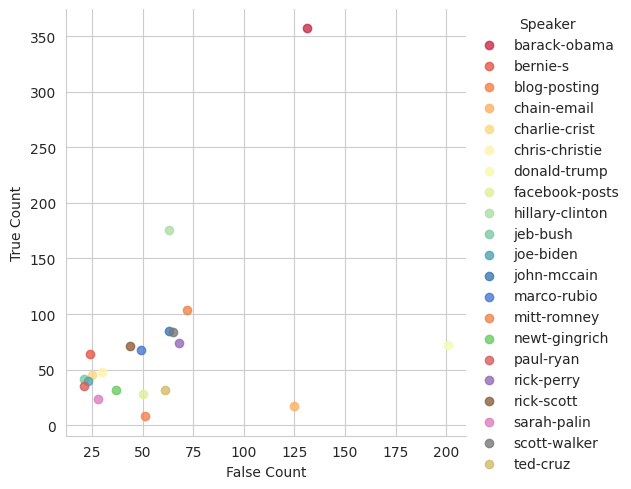

In [ ]:
# Create a merged palette with colors from spectral and muted color palettes
palette1 = sns.color_palette("Spectral", 12)
palette2 = sns.color_palette("muted", 12)
palette3 = sns.color_palette("coolwarm", 12)
merged_palette = palette1 + palette2 + palette3

palette = sns.color_palette(palette=merged_palette, n_colors=30)

# The x axis will be the ratio and the y axis will be the True Count. people who are more above on the line are the people who say more truths than lies
seaborn_plot = sns.lmplot(data=merged_counts[(merged_counts["True Count"] + merged_counts["False Count"]) >= 50],
           x="False Count", y="True Count", palette=merged_palette, hue="Speaker")

# The ratios of true to false statements made by individuals with more than 50 statements
plt.show()

# Separating items with multiple subjects
Some of the subjects have multiple subjects that fall under multiple, already mentioned, subjects in the dataset. When we want to analyze how different subjects tend to have misinformation potentially spread by political parties, we need to separate them.
- This will get only one subject per entry (e.g. a row with "alcohol, children, crime" as the subject will become 3 rows, so we can easily and more thoroughly group by subject)
- By not separating, an article that would be tied to the alcohol subject wouldn't be counted if its subject is "alcohol, children, and crime". It will be counted as its own subject.

In [ ]:
# This will separate each subject with multiple subjects into their own column (one subject per row)
# Note: some of the subjects seem to have multiple subjects related to it
# Open the csv test file and label the columns (Names from the README File)
liar_dataset_exploded = pd.read_csv("train.tsv", sep='\t', header=None,
                           names=["ID", "Label", "Statement", "Subject", "Speaker", "Speaker Job Title",
                                    "State Info", "Party Affiliation", "Barely True Count", "False Count",
                                  "Half True Count", "Mostly True Count", "Pants on Fire Count", "Context/Location"])

hierarchy = {
    'true': 1,
    'mostly-true': 1,
    'half-true': 1,
    'barely-true': 0,
    'false': 0,
    'pants-fire': 0
}

liar_dataset_exploded["Truth Index"] = liar_dataset_exploded["Label"].map(hierarchy)

# Make it so that the liar data set is exploded by subject - i.e. Each row will have one subject,
# The statements with multiple subjects will be repeated but with a different subjecty
liar_dataset_exploded["Subject"] = liar_dataset_exploded["Subject"].str.split(",")
liar_dataset_exploded = liar_dataset_exploded.explode("Subject")
liar_dataset_exploded['Subject'] = liar_dataset_exploded['Subject'].str.strip()
liar_dataset_exploded

,ID,Label,Statement,Subject,Speaker,Speaker Job Title,State Info,Party Affiliation,Barely True Count,False Count,Half True Count,Mostly True Count,Pants on Fire Count,Context/Location,Truth Index
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,0
1,10540.json,half-true,When did the decline of coal start? It started...,energy,scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1
1,10540.json,half-true,When did the decline of coal start? It started...,history,scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1
1,10540.json,half-true,When did the decline of coal start? It started...,job-accomplishments,scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,3959.json,half-true,Says an alternative to Social Security that op...,social-security,herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate,1
10238,2253.json,false,On lifting the U.S. Cuban embargo and allowing...,florida,jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...,0
10238,2253.json,false,On lifting the U.S. Cuban embargo and allowing...,foreign-policy,jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...,0
10239,1155.json,pants-fire,The Department of Veterans Affairs has a manua...,health-care,michael-steele,chairman of the Republican National Committee,Maryland,republican,0.0,1.0,1.0,0.0,2.0,a Fox News interview,0


## Studying the Trends of Statements of Individuals Based on Their Political Affiliations
Objective: We are trying to look at whether some parties have a trend of spreading more misinformation compared to others.

- There are more than 20 parties mentioned in the dataset. Some of these organizations have hundreds or thousands of statements made from individuals affiliated with those parties; however, there are some organizations that have only one or two statements. We want to focus on just the top five parties with the most statements since they might have a larger influence compared to others.

- We will find the Political Parties with the most statements by "counting" the number of statements based on the "Political Affiliation" column and taking the top five. For the statements that do not fall in the top five, we will group them as "Other". There should be six different parties shown on the graph.

The reasoning to look at party affiliations is that if a certain affiliation has a trend of making mostly to completely false statements, we would know to treat the statements made by individuals of that party with more scrutiny when deciding to mark a statement as false.

# What we can learn from the graph below:
### The parties with the most statements made overall are Democrats and Republicans - Two American Political Parties, and individuals with no party affiliations seem to be the third highest.
- Republicans tend to have a highest count of statements labeled as "pants-fire", "false", "barely true", or "half-true" compared to other parties' statements under the same label. Democrats seem to have a highest count of "mostly-true" statements compared to other political affiliations with the same label.
- Individuals with no affiliations seem to be distributed more evenly throughout the graph. However, the three labels with the highest number of unaffiliated speakers are "false", "half-true", and "mostly-true".
- Democrats' statements tend to be labeled as "mostly-true" and "half-true", or "true" across the graph, as compared to "barely-true", "false", and "pants on fire".

By looking at how statements' truthfulness compare between each party, we can identify where our model would need to focus on more when identifying fake news. If a certain party makes a higher number of false statements compared to other parties, then we could assume that there is a higher chance of that party making false statements in the future.

<ipython-input-17-2c9a88bccff7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liar_subset['Party Affiliation'] = liar_subset['Party Affiliation'].apply(lambda x: x if (x in top_affiliations) else 'Other')
<ipython-input-17-2c9a88bccff7>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  liar_barplot = sns.barplot(data=filtered_liar_dataset, x="Label", y="count", palette=color_palette, hue="Party Affiliation", ci=None)


,ID,Label,Statement,Subject,Speaker,Speaker Job Title,State Info,Party Affiliation,Barely True Count,False Count,Half True Count,Mostly True Count,Pants on Fire Count,Context/Location,Truth Index
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,0
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,1
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,0
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report""",1
10236,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview,1
10237,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate,1
10238,2253.json,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...,0


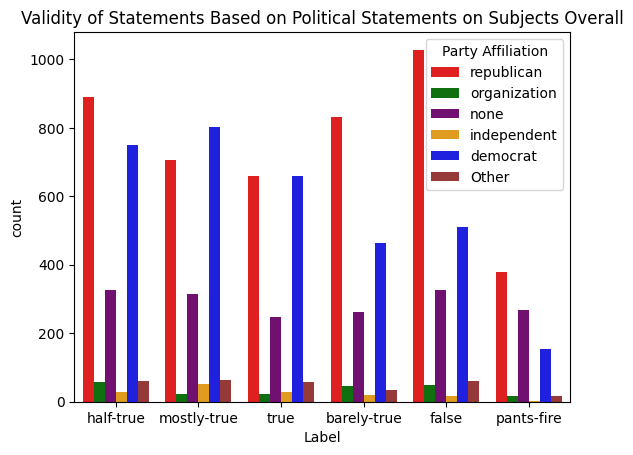

In [ ]:
# get the entries where there is a political affiliation associated with the individual
liar_subset = liar[
    (liar["Party Affiliation"].isnull() == False)]
liar_subset.groupby("Party Affiliation").size().reset_index(name="count")


# Step 1: Identify the top 4 party affiliations based on count
top_affiliations = liar_subset["Party Affiliation"].value_counts().index[:5]

# Step 2: Group the rest into "Other" and map every entry based on whether they fall into the top 5 affiliations
liar_subset['Party Affiliation'] = liar_subset['Party Affiliation'].apply(lambda x: x if (x in top_affiliations) else 'Other')

# filter by party, label, and truth index, and count the values that show up for each party affiliation
filtered_liar_dataset = liar_subset.groupby(['Party Affiliation',
                                             'Label', "Truth Index"]).size().reset_index(name='count').sort_values(by=['Party Affiliation',
                                                                                                                       "Truth Index"], ascending=False)
# filtered_liar_dataset
# How do certain subjects and their validity relate to one another
color_palette = {'republican': 'red', 'democrat': 'blue', 'none': 'purple', 'independent': 'orange', 'organization' : 'green', 'Other' : 'brown'}

liar_barplot = sns.barplot(data=filtered_liar_dataset, x="Label", y="count", palette=color_palette, hue="Party Affiliation", ci=None)
liar_barplot.set_title("Validity of Statements Based on Political Statements on Subjects Overall")
liar_barplot
liar_subset

# Among certain subjects, which party spreads the most misinformation?

# What we can learn from the graphs Below:


In [ ]:
# find individuals where the party affiliation is not null
liar_subset = liar_dataset_exploded [
    (liar_dataset_exploded["Party Affiliation"].isnull() == False)]
# energy_liar_subset

# find the top 5 affiliations in this dataset
top_affiliations = liar_subset["Party Affiliation"].value_counts().index[:5]   # this would take the affiliations among the parties
top_affiliations

# define the color palette in the top affiliations
color_palette = {'republican': 'red', 'democrat': 'blue', 'none': 'purple', 'independent': 'orange', 'organization' : 'green', 'Other' : 'brown'}

<ipython-input-19-406b10bb534f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_liar_subset['Party Affiliation'] = energy_liar_subset['Party Affiliation'].apply(lambda x: x if (x in top_affiliations) else 'Other')


<Axes: title={'center': 'Validity of Statements Based on Political Statements on Energy'}, xlabel='Label', ylabel='count'>

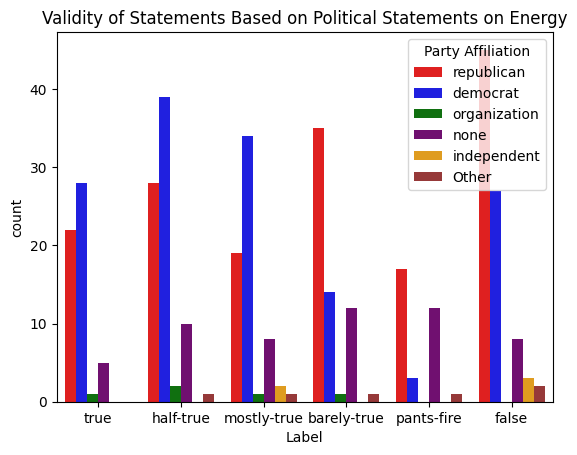

In [ ]:
energy_liar_subset = liar_subset[liar_subset["Subject"] == "energy"]
# # Step 2: Group the rest into "Other"
energy_liar_subset['Party Affiliation'] = energy_liar_subset['Party Affiliation'].apply(lambda x: x if (x in top_affiliations) else 'Other')

# # filter by subject, party, label, and truth index
filtered_liar_dataset = energy_liar_subset.groupby(['Subject', 'Party Affiliation', 'Label', "Truth Index"]).size().reset_index(name='count').sort_values(by='Truth Index', ascending=False)

# energy_liar_dataset = filtered_liar_dataset[filtered_liar_dataset["Subject"] == "energy"]     # filter for the entries where subject is energy
# # How do certain subjects and their validity relate to one another
liar_barplot = sns.barplot(data=filtered_liar_dataset, x="Label", y="count", palette=color_palette, hue="Party Affiliation", errorbar=None)
liar_barplot.set_title("Validity of Statements Based on Political Statements on Energy")
liar_barplot

<ipython-input-20-be0abf53adf4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abortion_liar_subset['Party Affiliation'] = abortion_liar_subset['Party Affiliation'].apply(lambda x: x if (x in top_affiliations) else 'Other')
<ipython-input-20-be0abf53adf4>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  liar_barplot = sns.barplot(data=filtered_liar_dataset, x="Label", y="count", palette=color_palette, hue="Party Affiliation", ci=None)


<Axes: title={'center': 'Validity of Statements Based on Political Statements on Abortion'}, xlabel='Label', ylabel='count'>

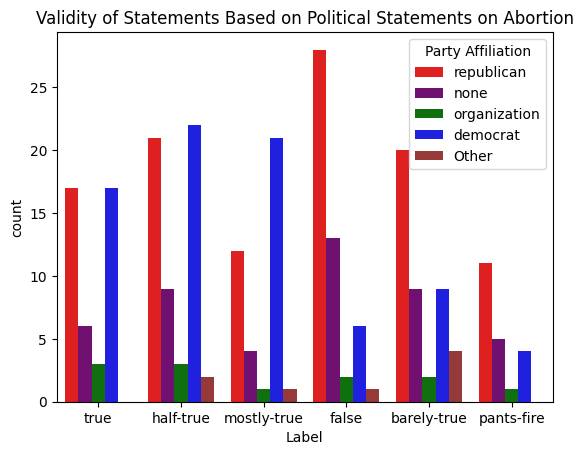

In [ ]:
abortion_liar_subset = liar_dataset_exploded[liar_dataset_exploded["Subject"] == "abortion"]     # filter for the entries where subject is abortion

# Step 2: Group the rest into "Other"
abortion_liar_subset['Party Affiliation'] = abortion_liar_subset['Party Affiliation'].apply(lambda x: x if (x in top_affiliations) else 'Other')

# filter by subject, party, label, and truth index
filtered_liar_dataset = abortion_liar_subset.groupby(['Subject', 'Party Affiliation', 'Label', "Truth Index"]).size().reset_index(name='count').sort_values(by='Truth Index', ascending=False)

# # # How do certain subjects and their validity relate to one another
liar_barplot = sns.barplot(data=filtered_liar_dataset, x="Label", y="count", palette=color_palette, hue="Party Affiliation", ci=None)
liar_barplot.set_title("Validity of Statements Based on Political Statements on Abortion")
liar_barplot

<ipython-input-21-b03c0611b7a1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreign_policy_liar_subset['Party Affiliation'] = foreign_policy_liar_subset['Party Affiliation'].apply(lambda x: x if x in top_affiliations else 'Other')


<Axes: title={'center': 'Validity of Statements Under the Foreign Policy Subject'}, xlabel='Label', ylabel='count'>

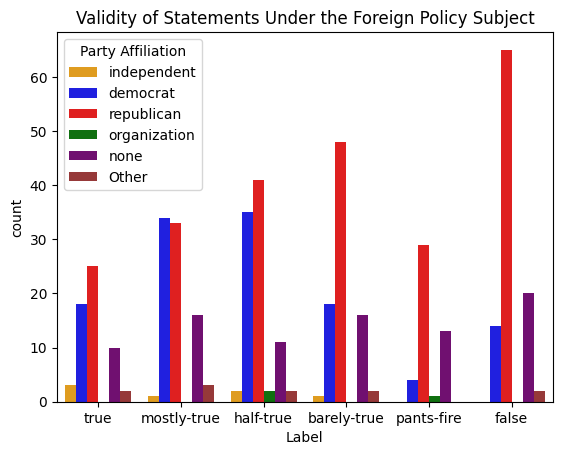

In [ ]:
# look at how the foreign policy subject statements match up between each party
foreign_policy_liar_subset = liar_dataset_exploded[liar_dataset_exploded["Subject"] == "foreign-policy"]     # filter for the entries where subject is energy

# Step 1: Identify the top 4 party affiliations based on count in this subset
# top_affiliations = alcohol_liar_subset["Party Affiliation"].value_counts().index[:5]

# # # Step 2: Group the rest into "Other"
foreign_policy_liar_subset['Party Affiliation'] = foreign_policy_liar_subset['Party Affiliation'].apply(lambda x: x if x in top_affiliations else 'Other')

# # # filter by subject, party, label, and truth index for the graph, and create a count index for counting the number of statements with each label
filtered_liar_dataset = foreign_policy_liar_subset.groupby(['Subject', 'Party Affiliation', 'Label', "Truth Index"]).size().reset_index(name='count').sort_values(by='Truth Index', ascending=False)

# # How do certain subjects and their validity relate to one another
liar_barplot = sns.barplot(data=filtered_liar_dataset, x="Label", y="count", palette=color_palette, hue="Party Affiliation", errorbar=None)
liar_barplot.set_title("Validity of Statements Under the Foreign Policy Subject")
liar_barplot


# Assuming statements could either be only true or only false, how often do political parties make false statements?
- We can assume that either statements can be only true or false.
- When we group all the statements as "true" or "false" (true -> half-true = true and pants on fire -> barely true = false), we can look at how each of these parties line up in terms of trustworthiness of their statements

<ipython-input-22-9988d6ef1f35>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  liar_barplot.set_xticklabels(['False', 'True'])


,Party Affiliation,Truth Index,count
1,Other,1,184
3,democrat,1,2209
5,independent,1,107
7,none,1,888
9,organization,1,107
11,republican,1,2257
0,Other,0,113
2,democrat,0,1127
4,independent,0,40
6,none,0,856


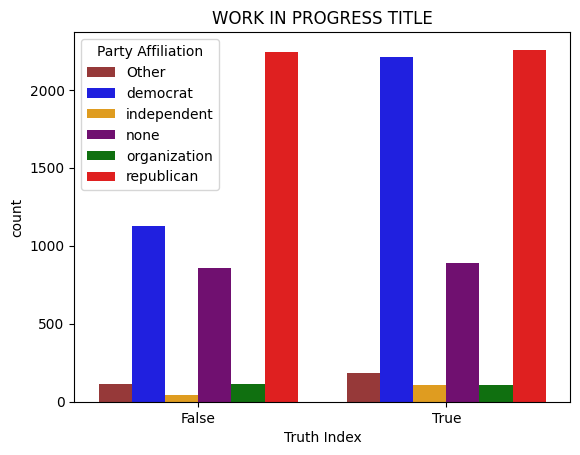

In [ ]:
true_false_liar_subset = liar

# find the columns in top_affiliations
true_false_liar_subset['Party Affiliation'] = true_false_liar_subset['Party Affiliation'].apply(lambda x: x if x in top_affiliations else 'Other')
true_false_liar_subset
true_false_liar_subset_grouped = liar.groupby(['Party Affiliation', "Truth Index"]).size().reset_index(name='count').sort_values(by='Truth Index', ascending=False)

total_per_each_party = liar.groupby(['Party Affiliation']).size().reset_index(name='count').sort_values(by='Party Affiliation', ascending=False)



# # How do certain subjects and their validity relate to one another
liar_barplot = sns.barplot(data=true_false_liar_subset_grouped, x="Truth Index", y="count", palette=color_palette, hue="Party Affiliation", errorbar=None)

# we will assume here that a statement can either be only false or true
liar_barplot.set_title("Total False and True Statements Made by the Top 5 Parties")
liar_barplot.set_xticklabels(['False', 'True'])
liar_barplot
true_false_liar_subset_grouped
# total_per_each_party

# Analysis of the Results from above
There seems to be a higher count of Democrats and Republicans overall making statements; however, we can still see that there is a significant difference of false statements and true statements for Democrats, Independents, and "Others", showing that there is at least a slight higher chance that a statement made by one of these groups is true.
Republicans and unaffiliated people, on the other hand, seem to have a trend of having a roughly almost equal number of false and true statements in the past.
The only affiliation with more false statements than true statements made overall were organizations.





# Can we look at words that are used more often in a certain subject compared to others?
- Can we build a Table or a scatterplot or Pie Chart for showing what words are used in different subjects we looked at?

- TF IDF on certain words being used? and where they might fall in validity
- How often do certain individuals appear in telling the truth among others? make clusters to find out on a scatterplot

# ML Analyeses - Taha and Younes

There are many factors to decide the best features to train the model on. Picking features with the most unique entries is one of them.

In [ ]:
liar.nunique()

ID                     10240
Label                      6
Statement              10223
Subject                 3827
Speaker                 2910
Speaker Job Title       1183
State Info                83
Party Affiliation          6
Barely True Count         30
False Count               30
Half True Count           29
Mostly True Count         27
Pants on Fire Count       20
Context/Location        4345
Truth Index                2
dtype: int64

time: 49.5 ms (started: 2024-04-06 04:10:47 +00:00)


Another one is picking the feature with the most entries to begin with.

In [ ]:
liar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10240 non-null  object 
 1   Label                10240 non-null  object 
 2   Statement            10240 non-null  object 
 3   Subject              10238 non-null  object 
 4   Speaker              10238 non-null  object 
 5   Speaker Job Title    7342 non-null   object 
 6   State Info           8030 non-null   object 
 7   Party Affiliation    10240 non-null  object 
 8   Barely True Count    10238 non-null  float64
 9   False Count          10238 non-null  float64
 10  Half True Count      10238 non-null  float64
 11  Mostly True Count    10238 non-null  float64
 12  Pants on Fire Count  10238 non-null  float64
 13  Context/Location     10138 non-null  object 
 14  Truth Index          10240 non-null  int64  
dtypes: float64(5), int64(1), object(9)
m

One final notable bit is that the dataset contains more true statements than false statements.

<Axes: xlabel='Truth Index', ylabel='count'>

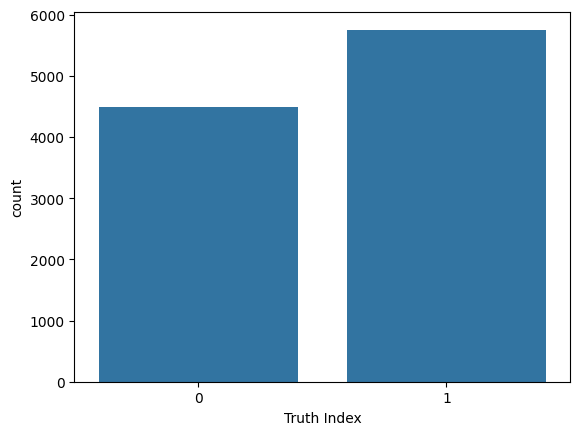

time: 1.3 s (started: 2024-04-06 04:11:04 +00:00)


In [ ]:
sns.countplot(data=liar, x='Truth Index')

## Data Pre-Training

First we must choose the features to train the model on. For this dataset, we'll use the Statement, Party Affiliation, and Subject features since they almost all filled in. If we included some other features such as Speaker we would end up with less entries to train the model on.

We then split the datasets into two sets of training and testing sets for each dataset we have.

In [ ]:
features = ["Statement", "Party Affiliation", "Subject"]

liar["Combined"] = liar[features].apply(lambda x: ' '.join(x.astype(str)), axis=1)
test["Combined"] = test[features].apply(lambda x: ' '.join(x.astype(str)), axis=1)

x_train = liar["Combined"]
y_train = liar["Truth Index"]

x_test = test["Combined"]
y_test = test["Truth Index"]

time: 3.03 s (started: 2024-04-06 04:11:06 +00:00)


Here, we apply TF-IDF vectorization to the training and test datasets from the liar set. This process not only uncovers the most relevant features of the data, but also allows the model to be trained by the vectorized data.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)



time: 743 ms (started: 2024-04-06 04:11:09 +00:00)


Now we scale the training and test datasets to center the data and achieve a normal distribution.

In [ ]:
scaler = StandardScaler(with_mean=False)
xv_train = scaler.fit_transform(xv_train)
xv_test = scaler.transform(xv_test)

time: 20.2 ms (started: 2024-04-06 04:11:10 +00:00)


Printing the resulting features from the vectorization.

In [ ]:
feature_names = vectorization.get_feature_names_out()
print(feature_names)

['00' '000' '000new' ... 'zoo' 'zuckerberg' 'zuckerbergs']
time: 39.3 ms (started: 2024-04-06 04:11:10 +00:00)


## Various Model Training

There are three main machine learning models we will test:

1. Support Vector Machines (SVM) Classification
2. K-Nearest Neighbors (KNN) Classification
3. Decision Trees

Each of the models will use the TF-IDF vectorized training data as well as the training data for the output class to fit the data. Then, the model will continue on to train using the fitted data and the TF-IDF vectorized testing data. Finally, the model will be evaluated using the predicted classifications from the training and the testing data. The precision, recall and f1-scores will be printed, as well as the accuracy of the model. Furthermore, to supplement the precision and recall, a graph the confusion matrix for each model will be shown.


### SVM Classification

In [ ]:
#Training SVM model
svm_model = SVC(kernel='rbf', C=1.0, random_state=42,probability=True)
svm_model.fit(xv_train, y_train)

y_pred = svm_model.predict(xv_test)

#Model evaluation
accuracy_1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5919494869771112
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.28      0.38       553
           1       0.60      0.83      0.70       714

    accuracy                           0.59      1267
   macro avg       0.58      0.56      0.54      1267
weighted avg       0.58      0.59      0.56      1267

time: 3min 54s (started: 2024-04-06 04:11:10 +00:00)


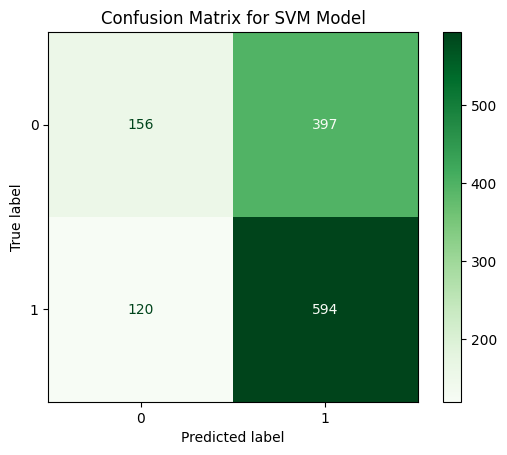

time: 253 ms (started: 2024-04-06 04:15:04 +00:00)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title('Confusion Matrix for SVM Model')
plt.show()

## KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Train KNN classifier
k = 5  # number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(xv_train, y_train)

y_pred = knn_classifier.predict(xv_test)

#Model evaluation
accuracy_2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_2)
print("Classification Report:")
# Additional evaluation metrics
print(classification_report(y_test, y_pred))

Accuracy: 0.5509076558800315
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.28      0.35       553
           1       0.58      0.76      0.66       714

    accuracy                           0.55      1267
   macro avg       0.53      0.52      0.50      1267
weighted avg       0.53      0.55      0.52      1267

time: 8.48 s (started: 2024-04-06 04:15:04 +00:00)


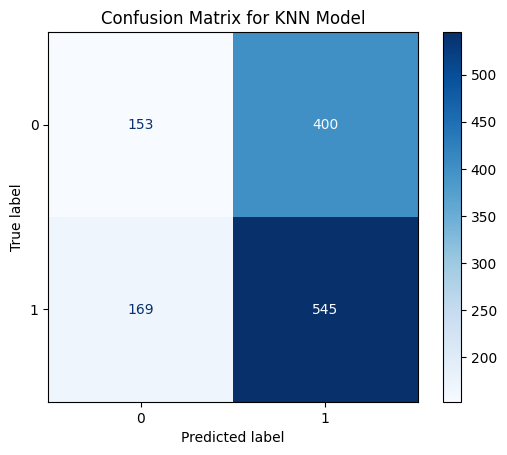

time: 271 ms (started: 2024-04-06 04:15:13 +00:00)


In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for KNN Model')
plt.show()

## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
y_pred = DT.predict(xv_test)
#print(DT.score(xv_test, y_test))
# Step 5: Model evaluation
accuracy_3 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_3)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.56353591160221
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.48      0.49       553
           1       0.61      0.63      0.62       714

    accuracy                           0.56      1267
   macro avg       0.55      0.55      0.55      1267
weighted avg       0.56      0.56      0.56      1267

time: 2.81 s (started: 2024-04-06 04:15:13 +00:00)


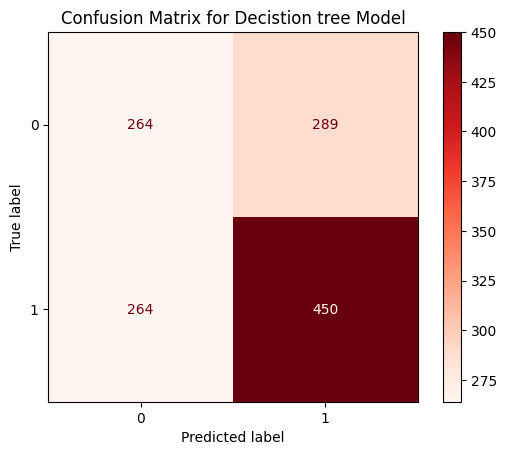

time: 249 ms (started: 2024-04-06 04:15:16 +00:00)


In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix for Decistion tree Model')
plt.show()

## Model accuracy comparison

### Baseline comparison

For this particular dataset, the baseline comparison would be a model that randomly guesses the truth classification of any statement. Though the original dataset has six different classifiers, since we have simplified that down to just two classifiers--true and false--we will have this baseline model use the same.

In that instance, the baseline model would effectively behave as a coin flip. And the probability of a coin flip is 50%, which would be the model's accuracy rating. As such, our model would have to be able to achieve an accuracy significantly greater than this baseline of 50% to be seen as a viable solution. Otherwise it wouldn't be much better than predicting a coin flip.

Plotting the decision tree where blue = true, and orange = false.

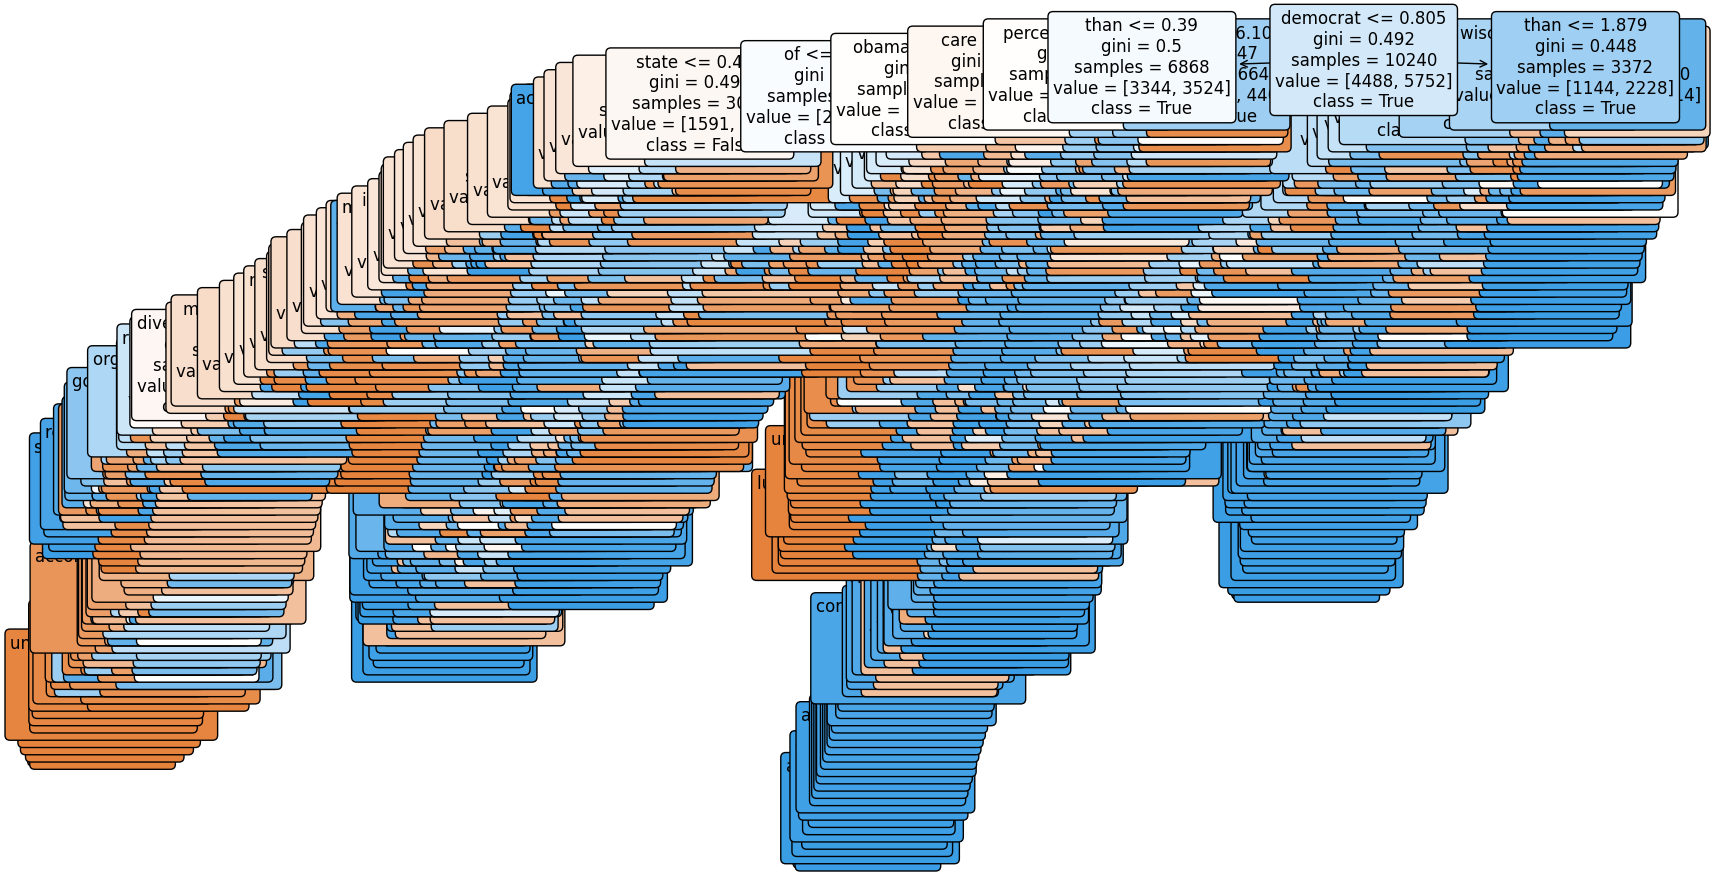

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(DT, filled=True, feature_names = feature_names, class_names=['False', 'True'], rounded=True, fontsize=12)
plt.show()

Plotted below is the accuracy rating for each of the models.

time: 1min 48s (started: 2024-04-06 04:15:16 +00:00)


<ipython-input-35-43b2322d9761>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)


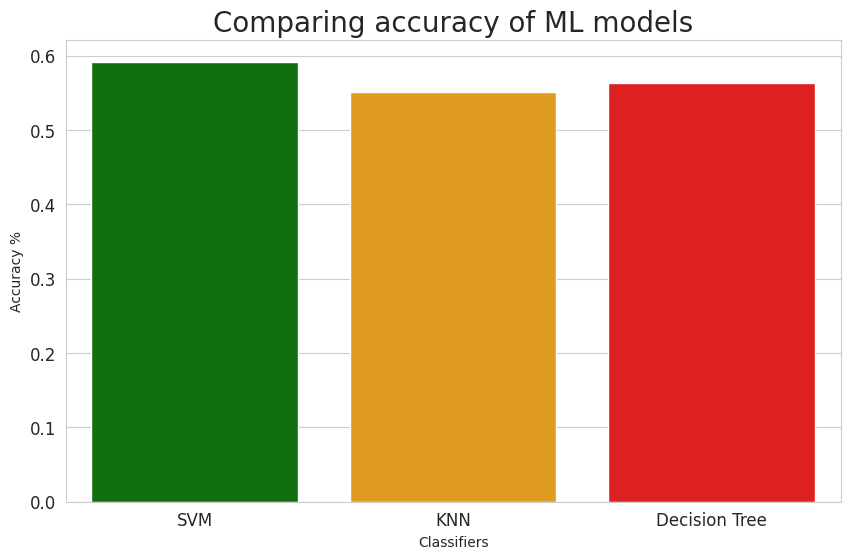

time: 424 ms (started: 2024-04-06 04:17:05 +00:00)


In [ ]:
# Models accuracy scores
accuracies = {
    "SVM": accuracy_1,
    "KNN": accuracy_2,
    "Decision Tree": accuracy_3
}

colors = ["green", "orange","red"]

# Plotting
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.title('Comparing accuracy of ML models', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Accuracy %")
plt.xlabel("Classifiers")

plt.show()

Plotted below is the ROC curve for the SVM model.

AUC-ROC: 0.6301280005673155


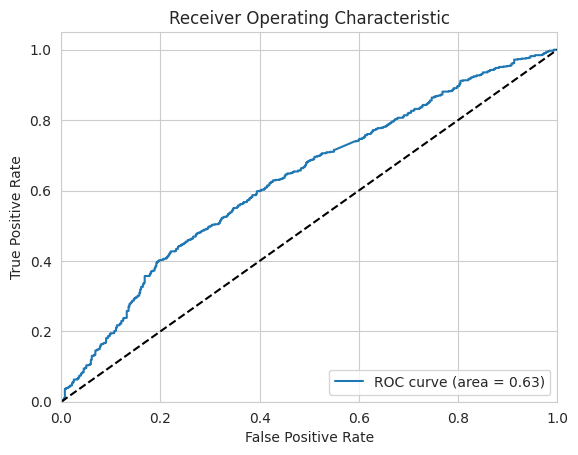

time: 4.08 s (started: 2024-04-06 04:17:05 +00:00)


In [ ]:
from sklearn.metrics import  roc_auc_score, roc_curve, auc
y_proba = svm_model.predict_proba(xv_test)[:, 1]  # Probability estimates for the positive class

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f'AUC-ROC: {roc_auc}')

# To plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Interpretation of results

In terms of accuracy, we observed that the SVM model outperformed the other two models, achieving an accuracy of 59%. Despite efforts to improve the model's accuracy through hyperparameter tuning, the accuracy remained within the same range. For SVM, the performance metrics for the positive class were generally acceptable, with a precision of 60%, recall of 83%, and a balance between precision and recall resulting in an F1-score of 0.70. Conversely, Class 0 (false) displayed a lower F1-score of 0.38. Another performance metric calculated was the AUC-ROC score, which yielded a score of 63%. This indicates that the SVM model has potential but still requires improvement.

The KNN model essentially followed the same pattern as the SVM model in detecting the true class and struggling with the false class. Lastly, the metrics for the Decision Tree model show improvement in handling the false class compared to SVM and KNN, with an F1-score of 0.49, but it doesn't perform better in the true class (F1-score of 0.62).

These outcomes led us to conclude that the models are struggling in identifying false statements and perform better with true statements. After multiple attempts at refining and tuning the models, a theory was raised that the text representation algorithm requires thorough testing, and there is a need to explore other text representation methods and semantics.

With a maximum accuracy of around 59%, and comparing that to our baseline, it could be better. To add, some of the lowest accuracy ratings witnessed throughout testing are only slightly the 50% baseline, which is very alarming. It is clear that we need to look further into feature selection and data parsing in order to increase the accuracy of our model.

One last piece of insight, we were curious as to what the runtime duration of each of the machine learning models is. Through multiple trials of each model, we found that the Decision Tree Model and KNN classification run in a reasonable amount of time at 1.84s and 5.33s on average respectively. However, the SVM model takes a considerably longer amount of time to complete. On average, the model takes 1m 51s to complete fitting, training, and evaluation, as the others did too. Although the SVM model performed the best compared to the other models tested, the difference is accuracy isn't massive, unlike the difference in runtime.

# Reflection

○ **What is the most challenging part of the project that you’ve encountered so far?**
  
  The most formidable challenge we’ve faced is the nuanced nature of fake news itself, which often blurs the line between truth and falsehood through sophisticated misinformation tactics. Specifically, accurately quantifying the truthfulness of statements and navigating the vast, varied landscape of political affiliations, subjects, and speaker credibility within the LIAR dataset presented significant hurdles. The preprocessing of textual data—transforming raw text into a format amenable to machine learning analysis through TF-IDF vectorization and feature engineering—was particularly demanding due to the complexity and subtlety of language used in the dataset.


○ **What are your initial insights?**

  Our exploratory data analysis (EDA) revealed intriguing patterns in the dissemination of misinformation, such as the propensity of certain individuals or platforms to spread fake news and the influence of political affiliation on the credibility of statements. Visualizations highlighted the varying truthfulness of statements from public figures and the potential subject areas prone to misinformation. These insights underscore the critical role of context, speaker profile, and content in assessing the veracity of news.


○ **Are there any concrete results you can show at this point? If not, why not?**

  At this juncture, we've achieved concrete results in the form of accuracy metrics from our machine learning models—SVM, KNN, and Decision Trees. These models have shown promise in classifying statements into truthful or misleading categories, with preliminary results offering a glimpse into their potential effectiveness. However, the nuanced nature of fake news and the inherent challenges in textual data analysis mean that these results are preliminary and require further refinement and validation.


○ **Going forward, what are the current biggest problems you’re facing?**

  Our current biggest challenges include improving model accuracy and handling the intricacies of language in fake news detection. Despite the sophistication of our models, distinguishing between subtly misleading information and truth remains complex. Additionally, ensuring our models are not biased towards particular subjects or political affiliations and can generalize across diverse datasets is a critical concern.


○ **Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?**

  We believe we are on track with our project but acknowledge the need for dedicated time to enhance model performance and data preprocessing. Enhancing the sophistication of our NLP techniques to better capture the subtleties of language and misinformation, and expanding our dataset to include more varied sources of information, are areas requiring further focus.


○ **Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?**

  Given our initial exploration of the data and the insights gained, we are confident it is worth proceeding with our project. The complexity of fake news detection presents a significant challenge but also a profound opportunity for impact. Our future efforts will concentrate on refining our models, exploring additional datasets for a more comprehensive analysis, and developing more nuanced approaches to understanding the spread of misinformation.


**In summary**: Our project has made promising strides in addressing the pervasive issue of fake news. As we move forward, we remain committed to refining our methodologies, expanding our analytical scope, and contributing to the development of effective tools for safeguarding the integrity of information in the digital age.


# Next Step




Over the next month, our team aims to enhance our project's approach to detecting fake news through a focused strategy. We plan to explore advanced machine learning algorithms, like neural networks and ensemble methods, and delve deeper into feature engineering with the aim of better capturing the nuances of misinformation. Additionally, we'll expand our dataset with diverse sources to improve model robustness and ensure our findings are generalizable. A key part of our efforts will involve optimizing data preprocessing and intensifying model validation and testing processes. By allocating specific tasks within the team, we aim to significantly boost the accuracy and reliability of our predictions, setting a solid groundwork for practical application.